# Explore Sampling for Air quality

## Introduction
In this notebook, we will engage in effective sampling as a way of continuation of the project we started for the United States Enviromental Protection Agency (EPA). Utilizing proper sampling techniques helps improve efficiency in this work. 

We are assigned to analyze data on air quality with respect to carbon monoxide—a major air pollutant—and report the findings during the next meeting with major stakeholders. The data utilized in this activity includes information from over 200 cites, identified by their state name, county name, city name, and local site name.

In [58]:
#Load data
epa_data= pd.read_csv(r'C:\Users\user\Desktop\Course 4\c4_epa_air_quality.csv', index_col= 0)

In [59]:
#Inspect dataset
epa_data.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


### Quick Insight
 AQI means Air Quality Index, and all the entry is measured in Parts per million as will be seen below.

In [68]:
# Create a variable for Parameter and units measured
unit_counts = epa_data['units_of_measure'].value_counts()
unit_counts

Parts per million    260
Name: units_of_measure, dtype: int64

### Generate a table of Descriptive statistics

In [70]:
epa_data.describe(include= 'all')

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260,260,260,260,257,260,260,260.000000,260.000000
unique,1,52,149,190,253,1,1,NaN,NaN
top,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,260,66,14,21,2,260,260,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403169,6.757692
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.317902,7.061707
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276315,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516009,9.000000


In [72]:
# Compute the population mean of aqi
population_mean = epa_data['aqi'].mean()
population_mean

6.757692307692308

# Statistical tests

### Sample with replacement

First, name a new variable `sampled_data`. Then, set the arguments for the sample function `N`, sample size, equal to `50`. Set `replace` equal to `“True”` to specify sampling with replacement. For `random_state`, choose an arbitrary number for random seed. Make that arbitrary number `42`.

In [74]:
sampled_data= epa_data.sample(n= 50, replace= True, random_state= 42)

In [75]:
sampled_data.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
106,2018-01-01,California,Imperial,Calexico,Calexico-Ethel Street,Carbon monoxide,Parts per million,1.183333,26
71,2018-01-01,Alabama,Jefferson,Birmingham,Arkadelphia/Near Road,Carbon monoxide,Parts per million,0.200000,2
188,2018-01-01,Arizona,Maricopa,Tempe,Diablo,Carbon monoxide,Parts per million,0.542105,10
20,2018-01-01,Virginia,Roanoke,Vinton,East Vinton Elementary School,Carbon monoxide,Parts per million,0.100000,1


### Compute the mean value from the `aqi` column

Compute the mean value from the `aqi` column in `sampled_data` and assign the value to the variable `sample_mean`.

In [82]:
sample_mean= sampled_data['aqi'].mean()
print(sample_mean)

5.54


## Quick Insight
Why is `sample_mean` different from `population_mean`?

- Due to sampling variability, the sample mean (`sample_mean`) is usually not the same as the population mean (`population_mean`). In this case, the sample mean is a point estimate of the population mean based on a random sample of 50 AQI values rather than the 260 AQI values from the original population in `epa_data`.  

### Apply the central limit theorem

Imagine repeating the the earlier sample with replacement 10,000 times and obtaining 10,000 point estimates of the mean. In other words, imagine taking 10,000 random samples of 50 AQI values and computing the mean for each sample. According to the **central limit theorem**, the mean of a sampling distribution should be roughly equal to the population mean.

* Create an empty list and assign it to a variable called `estimate_list`. 
* Iterate through a `for` loop 10,000 times. To do this, make sure to utilize the `range()` function to generate a sequence of numbers from 0 to 9,999. 
* In each iteration of the loop, use the `sample()` function to take a random sample (with replacement) of 50 AQI values from the population. Do not set `random_state` to a value.
* Use the list `append()` function to add the value of the sample `mean` to each item in the list.

### The purpose is to ensure that the sample mean is closer to the population mean

In [95]:
estimate_list= []
for i in range(10000):
    estimate_list.append(epa_data['aqi'].sample(n=50, replace= True,).mean())

### Create a new DataFrame

Next, create a new DataFrame from the list of 10,000 estimates. Name the new variable `estimate_df`.

In [96]:
estimate_df= pd.DataFrame(data= {'estimate': estimate_list})

In [97]:
mean_sample_means= estimate_df.mean()
mean_sample_means

estimate    6.743762
dtype: float64

## Quick insight
 We see that the actual population mean is `6.75769`, the sample mean of a set of 50 random numbers is `5.54`, while the mean of 10000 random sample is `6.74376` which is very close to the population mean compared to the mean of a set of 50 random numbers.

## Note
Random sampling with replacement is related to the central limit theorem because it means you are drawing observations independently from a population. The central limit theorem states that if a sample size is large enough and the observations are drawn independently—or with replacement—the sampling distribution of the sample mean is approximately the normal distribution. Furthermore, the mean parameter is the population mean and the variance parameter is the standard error. 

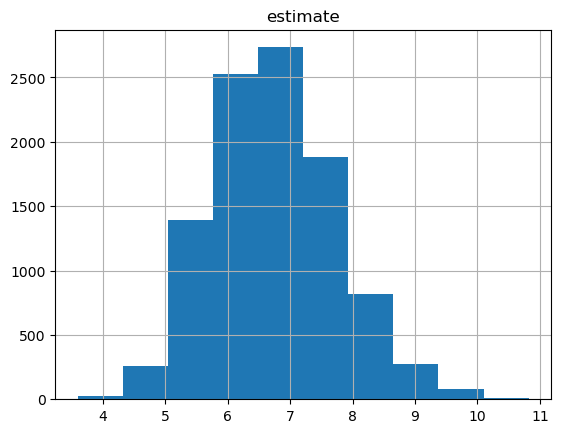

In [103]:
#Output the distribution of these estimates using a histogram. This provides an idea of the sampling distribution
estimate_df.hist()
plt.show()

### Calculate the standard error

Calculate the standard error of the statistic. The **standard error** of a statistic is the standard deviation of the sampling distribution associated with the statistic. It provides a numerical measure of sampling variability and answers the question: How far is a statistic based on one particular sample from the typical value of the statistic?

In [106]:
standard_error= estimate_df.std()
standard_error

estimate    0.991371
dtype: float64

# Considerations

#### My Insights to data professionals
- The mean AQI in a sample of 50 observations was below 100 in a statistically significant sense (at least 2–3 standard errors away). For reference, AQI values at or below 100 are generally thought of as satisfactory.
- This notebook didn't examine values outside the "satisfactory" range so analysis should be done to investigate unhealthy AQI values.

#### My Insights to stakeholders
- Carbon monoxide levels are satisfactory in general.  
- Funding should be allocated to further investigate regions with unhealthy levels of carbon monoxide and improve the conditions in those regions.

